<a href="https://www.kaggle.com/code/kumarsampurn/resteraunt-recommendation-system?scriptVersionId=162967956" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Collaborative filtering
The **Collaborative filtering method** for recommender systems is a method that helps in new recommendations based on the past interactions that have been recorded between users and items.

### Task
The dataset contains a set of 129 restaurants, with each of them serving a unique cuisine in their own style.
In this notebook, we will be exploring and analysing the ratings given by customers to each of these restaurants.

### Dataset Details

**place_id**: A unique 6-digit code given to each restaurant.

**name**: Name of the restaurant.

**user_id**: A unique 4-digit id given to each customer.

**rating**: Ratings given by the customer to the restaurant, with values [0,1,2].

**price**: Affordability of the restaurant, with values [high, medium, low]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv("/kaggle/input/ratings/72.-73.ratings.csv")

In [3]:
df.head()

,Unnamed: 0,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,zip,accessibility,price,Rambience,franchise,area,other_services,userID,rating
0,0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1093,2
1,1,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1066,1
2,2,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1040,1
3,3,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1110,2
4,4,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1121,2


In [4]:
df.shape

(1157, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1157 non-null   int64  
 1   placeID         1157 non-null   int64  
 2   latitude        1157 non-null   float64
 3   longitude       1157 non-null   float64
 4   the_geom_meter  1157 non-null   object 
 5   name            1157 non-null   object 
 6   address         1157 non-null   object 
 7   city            1157 non-null   object 
 8   state           1157 non-null   object 
 9   country         1157 non-null   object 
 10  zip             1157 non-null   int64  
 11  accessibility   1157 non-null   object 
 12  price           1157 non-null   object 
 13  Rambience       1157 non-null   object 
 14  franchise       1157 non-null   object 
 15  area            1157 non-null   object 
 16  other_services  1157 non-null   object 
 17  userID          1157 non-null   i

In [6]:
df.describe()

,Unnamed: 0,placeID,latitude,longitude,zip,userID,rating
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,580.613656,134197.669836,21.979605,-100.613111,82866.627485,1070.985307,1.199654
std,335.712837,1098.638895,1.143929,0.722407,79657.156808,40.623075,0.774194
min,0.000000,132560.000000,18.859803,-101.028600,17573.000000,1001.000000,0.000000
25%,289.000000,132856.000000,22.143078,-100.989134,72300.000000,1034.000000,1.000000
50%,582.000000,135030.000000,22.150802,-100.977412,78000.000000,1073.000000,1.000000
75%,871.000000,135059.000000,22.156469,-100.933585,78349.000000,1106.000000,2.000000
max,1160.000000,135109.000000,23.760268,-99.126506,782231.000000,1138.000000,2.000000


Lets try to make a Heatmap to visualise the correlation between the number of ratings and the average ratings of each place.


In [7]:
unique_place_ids = df['placeID'].nunique()
print(f'Total number of unique place IDs: {unique_place_ids}')


Total number of unique place IDs: 129


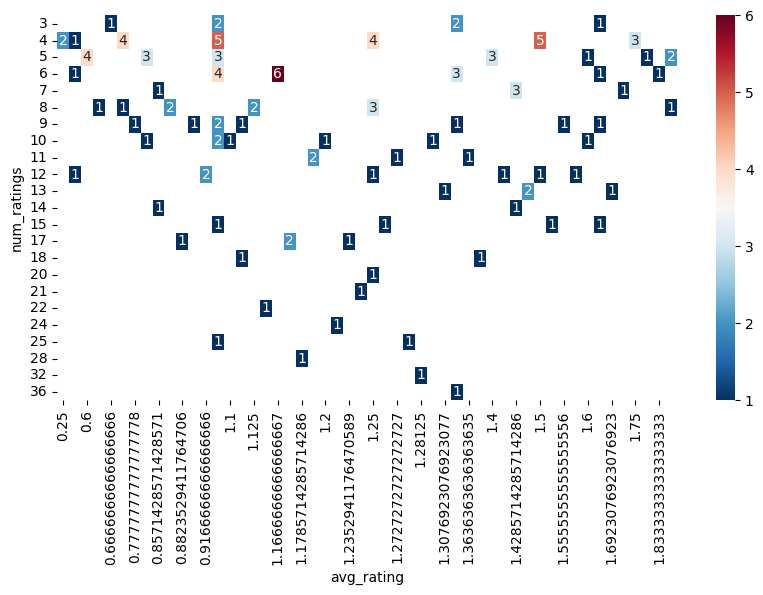

In [8]:

item_ratings =df.groupby('placeID').agg({'rating': ['count', 'mean']}).reset_index()



item_ratings.columns = ['placeID', 'num_ratings', 'avg_rating']


pivot =item_ratings.pivot_table(index='num_ratings', columns='avg_rating', values='placeID', aggfunc='count')


plt.figure(figsize=(10,5))
sns.heatmap(pivot, cmap='RdBu_r',annot=True);


In [9]:
item_ratings

,placeID,num_ratings,avg_rating
0,132560,4,0.500000
1,132561,4,0.750000
2,132572,15,1.000000
3,132583,4,1.000000
4,132584,6,1.333333
...,...,...,...
124,135088,6,1.000000
125,135104,7,0.857143
126,135106,10,1.200000
127,135108,11,1.181818


**User-based Filtering**

Lets find the correlation between restaurants. and Recommend 15 restaurants that the customers of the restaurant `La Posada del Virrey` are expected to like.

In [10]:
# Matrix Factorization (pivot_table)

itemratings =df.pivot_table(index='userID', columns='name', values='rating' , fill_value=0)

itemratings.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:


def calc_corr(df_rest, rest_name):
    similar_to_rest = df_rest.corrwith(df_rest[rest_name])
    corr_rest = pd.DataFrame(similar_to_rest, columns=['Correlation'])
    corr_rest.dropna(inplace=True)
    corr_rest = corr_rest.sort_values(by='Correlation', ascending=False)
    return corr_rest

    

In [12]:
rest_name = 'La Posada del Virrey'

res = calc_corr(itemratings, rest_name)

res.head(15)

,Correlation
name,
La Posada del Virrey,1.000000
Gorditas Doa Gloria,0.414209
Restaurant Bar Hacienda los Martinez,0.339003
Restaurante El Cielo Potosino,0.325851
el pueblito,0.306654
Tortas Locas Hipocampo,0.293239
Preambulo Wifi Zone Cafe,0.272565
La Cantina Restaurante,0.264534
Unicols Pizza,0.260574


**Item-based filtering**

Lets Calculate the cosine similarity between restaurants to measure their similarity.

Then item-based filtering to recommend upto 5 restaurants to users based on their previous ratings.


In [13]:

user_restaurant_ratings = df.pivot_table(index='userID',columns='name', values='rating', fill_value=0 )

user_restaurant_ratings = user_restaurant_ratings.fillna(0)
user_restaurant_ratings.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
user_restaurant_ratings.T

userID,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
Cafe Chaires,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafeteria cenidet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos de la estacion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos los volcanes,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [15]:
restaurant_similarity =cosine_similarity(user_restaurant_ratings.T)

restaurant_similarity_df =pd.DataFrame(restaurant_similarity, index=user_restaurant_ratings.columns, columns=user_restaurant_ratings.columns)

restaurant_similarity_df

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,1.0,0.000000,0.000000,0.000000,0.000000,0.162221,0.000000,0.0,0.000000,0.0,...,0.048450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arrachela Grill,0.0,1.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cabana Huasteca,0.0,0.000000,1.000000,0.221313,0.000000,0.044777,0.000000,0.0,0.000000,0.0,...,0.441326,0.213809,0.043644,0.000000,0.000000,0.000000,0.000000,0.159364,0.000000,0.000000
Cafe Chaires,0.0,0.000000,0.221313,1.000000,0.000000,0.086711,0.163663,0.0,0.000000,0.0,...,0.155386,0.000000,0.338062,0.000000,0.000000,0.000000,0.000000,0.102869,0.000000,0.000000
Cafeteria cenidet,0.0,0.316228,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.408248,0.0,...,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,0.000000,0.000000,0.000000,0.816497
tacos de la estacion,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.577350,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.288675,0.000000
tacos los volcanes,0.0,0.000000,0.159364,0.102869,0.000000,0.124878,0.235702,0.0,0.000000,0.0,...,0.055945,0.000000,0.121716,0.136083,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [16]:

def recommend_restaurants(userID, num_recommendations=5):
    user_ratings = user_restaurant_ratings.loc[userID].values.reshape(1, -1)

    similar_restaurants = pd.DataFrame(restaurant_similarity_df[user_restaurant_ratings.columns].dot(user_ratings.T), index=user_restaurant_ratings.columns, columns=['Similarity'])
    similar_restaurants = similar_restaurants.sort_values(by='Similarity', ascending=False)

    recommended_restaurants = similar_restaurants.head(num_recommendations)
    return recommended_restaurants


In [17]:
user_id = 1093
recommended_restaurants = recommend_restaurants(user_id)
recommended_restaurants

,Similarity
name,
Abondance Restaurante Bar,NaN
Arrachela Grill,NaN
Cabana Huasteca,NaN
Cafe Chaires,NaN
Cafeteria cenidet,NaN


a. For the above restaurant recommendation system, how would you design a hybrid approach that leverages both user-based and item-based collaborative filtering?

b. Do you see any potential challenges or trade-offs associated with implementing such a hybrid recommendation system for restaurants?

a) If a user is relatively new and hasn't rated many restaurants, relying more on item-based recommendations might be beneficial. As the user provides more ratings, the system could gradually shift towards user-based recommendations.

b) 
* cold start problem 
* good resteraunts will get recommeded and keep on getting recommeded, new resteraunts will be left behing


More information on [hybrid recommendation systems](https://medium.com/grabngoinfo/hybrid-recommendation-system-using-user-based-and-item-based-collaborative-filtering-c5e8283cd2dc#:~:text=In%20a%20switching%20hybrid%20method,one%20approach%20over%20the%20other.)

****